In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#loading the preprocessed dataset
df=pd.read_csv('/content/drive/MyDrive/hazard/modelDataset.csv')

In [ ]:
df.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
disasterNumber                4832
region                          23
stateNumberCode                 23
state                           23
countyCode                    1055
county                        1055
city                             2
zip                              8
propertyAction                   0
structureType                    0
typeOfResidency                  0
actualAmountPaid             21428
programFy                        0
status                           0
programArea                      0
type                             0
numberOfProperties               0
granteeTribalIndicator           0
subgranteeTribalIndicator        0
dtype: int64

In [ ]:
# We are dropping location as we tested and location is not adding any useful insight
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','region','stateNumberCode','state','countyCode','county','city','zip'],inplace=True)

In [ ]:
#convertig disaster number to is agency handled or not
df.loc[pd.notnull(df['disasterNumber']),'disasterNumber']=1
df.loc[pd.isnull(df['disasterNumber']),'disasterNumber']=0

In [ ]:
df.rename(columns={'disasterNumber':'IsAgencyHandling'},inplace=True)

In [ ]:
df.head()

,IsAgencyHandling,propertyAction,structureType,typeOfResidency,actualAmountPaid,programFy,status,programArea,type,numberOfProperties,granteeTribalIndicator,subgranteeTribalIndicator
0,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,1362.0,1999,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,2,No,No
1,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,NaN,2001,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,1,No,No
2,1.0,Acquisition/Relocation,Manufactured Home,Rental,2846.0,1999,Closed,HMGP,200.1: Acquisition of Private Real Property (S...,5,No,No
3,1.0,Seismic Retrofit,Other (Specify in Comments),Other (Specify in Comments),NaN,2001,Closed,HMGP,205.4: Non Structural Retrofitting/Rehabilitat...,2,No,No
4,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,NaN,1999,Approved,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,42,No,No


In [ ]:
#Convert a same vale in different columns to different values
property_action_lst=df['propertyAction'].unique()

In [ ]:
structure_lst=df['structureType'].unique()

In [ ]:
typeofres_lst=df['typeOfResidency'].unique()

In [ ]:
set(property_action_lst).intersection(set(structure_lst))

{'Other (Specify in Comments)'}

In [ ]:
set(property_action_lst).intersection(set(typeofres_lst))

{'Other (Specify in Comments)'}

In [ ]:
set(typeofres_lst).intersection(set(structure_lst))

{'Other (Specify in Comments)'}

In [ ]:
df.loc[df['propertyAction']=='Other (Specify in Comments)','propertyAction']='Other (Specify in Comments)_PA'
df.loc[df['structureType']=='Other (Specify in Comments)','structureType']='Other (Specify in Comments)_ST'
df.loc[df['typeOfResidency']=='Other (Specify in Comments)','typeOfResidency']='Other (Specify in Comments)_TR'

In [ ]:
df.head()

,IsAgencyHandling,propertyAction,structureType,typeOfResidency,actualAmountPaid,programFy,status,programArea,type,numberOfProperties,granteeTribalIndicator,subgranteeTribalIndicator
0,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,1362.0,1999,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,2,No,No
1,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,NaN,2001,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,1,No,No
2,1.0,Acquisition/Relocation,Manufactured Home,Rental,2846.0,1999,Closed,HMGP,200.1: Acquisition of Private Real Property (S...,5,No,No
3,1.0,Seismic Retrofit,Other (Specify in Comments)_ST,Other (Specify in Comments)_TR,NaN,2001,Closed,HMGP,205.4: Non Structural Retrofitting/Rehabilitat...,2,No,No
4,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,NaN,1999,Approved,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,42,No,No


In [ ]:
# Converting to numerical columns
df.loc[df['granteeTribalIndicator']=='No','granteeTribalIndicator']=0
df.loc[df['granteeTribalIndicator']=='Yes','granteeTribalIndicator']=1
df.loc[df['subgranteeTribalIndicator']=='No','subgranteeTribalIndicator']=0
df.loc[df['subgranteeTribalIndicator']=='Yes','subgranteeTribalIndicator']=1

In [ ]:
df['actualAmountPaid'].fillna(df['actualAmountPaid'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

IsAgencyHandling             0
propertyAction               0
structureType                0
typeOfResidency              0
actualAmountPaid             0
programFy                    0
status                       0
programArea                  0
type                         0
numberOfProperties           0
granteeTribalIndicator       0
subgranteeTribalIndicator    0
dtype: int64

In [ ]:
df.head()

,IsAgencyHandling,propertyAction,structureType,typeOfResidency,actualAmountPaid,programFy,status,programArea,type,numberOfProperties,granteeTribalIndicator,subgranteeTribalIndicator
0,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,1362.000000,1999,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,2,0,0
1,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,254103.213057,2001,Closed,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,0
2,1.0,Acquisition/Relocation,Manufactured Home,Rental,2846.000000,1999,Closed,HMGP,200.1: Acquisition of Private Real Property (S...,5,0,0
3,1.0,Seismic Retrofit,Other (Specify in Comments)_ST,Other (Specify in Comments)_TR,254103.213057,2001,Closed,HMGP,205.4: Non Structural Retrofitting/Rehabilitat...,2,0,0
4,1.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,254103.213057,1999,Approved,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,42,0,0


Correlation Matrix

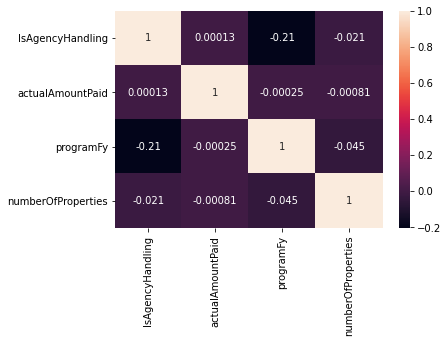

In [ ]:
# Checking the correlation in Numerical columns
sns.heatmap(df.corr(),annot=True)

In [ ]:
#converting categorical columns to one hot encoding
df1=pd.get_dummies(df,columns=['propertyAction','structureType','typeOfResidency','status','type'])

In [ ]:
df1.shape

(61835, 386)

In [ ]:
df1.head()

,IsAgencyHandling,actualAmountPaid,programFy,programArea,type,numberOfProperties,granteeTribalIndicator,subgranteeTribalIndicator,propertyAction_Acquisition of Vacant Land,propertyAction_Acquisition/Demolition,propertyAction_Acquisition/Relocation,propertyAction_Elevation,propertyAction_Floodproofed,propertyAction_Mitigation Reconstruction,propertyAction_Other (Specify in Comments)_PA,propertyAction_Retro (1/15/2008 - DSG),propertyAction_Safe Room/Wind Shelter,propertyAction_Seismic Retrofit,propertyAction_Wildfire Retrofit,propertyAction_Wind Retrofit,propertyAction_Wind Retrofit Advanced(A-P804),propertyAction_Wind Retrofit Basic (B-P804),propertyAction_Wind Retrofit Estimated(ES-P804),structureType_2-4 Family,structureType_Manufactured Home,structureType_Multi-Family Dwelling - 5 or More Units,structureType_Non-residential - Private,structureType_Non-residential - Public,structureType_Other (Specify in Comments)_ST,structureType_Single Family,structureType_Vacant Land,typeOfResidency_Not Applicable,typeOfResidency_Other,typeOfResidency_Other (Specify in Comments)_TR,typeOfResidency_Owner Occupied - Principal Residence,typeOfResidency_Owner Occupied - Secondary Residence,typeOfResidency_Owner Occupied- Secondary Residence,typeOfResidency_Owner Occupied-Principal Residence,typeOfResidency_Primary,typeOfResidency_Rental,typeOfResidency_Secondary,status_Approved,status_Awarded,status_Closed,status_Completed,status_Obligated
0,1.0,1362.0,1999,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.0,NaN,2001,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1.0,2846.0,1999,HMGP,200.1: Acquisition of Private Real Property (S...,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,NaN,2001,HMGP,205.4: Non Structural Retrofitting/Rehabilitat...,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,NaN,1999,HMGP,206.1: Safe Room (Tornado and Severe Wind Shel...,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Splitting Dataset into train (80%) and test (20%)
Y=df1['programArea']
df1.drop(columns=['programArea'],inplace=True)
X=df1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0,stratify=Y)

In [ ]:
Y.value_counts()

HMGP    57000
FMA      2547
PDM      1382
SRL       623
LPDM      189
RFC        94
Name: programArea, dtype: int64

In [ ]:
#checking Categorical variables association.
'''
Hypothesis: Features are dependent to each other and have relationship with target variable.
Alternative: Features are independent to each other and have no relationship with target variable.
Result: As we got very less values for 55,117 among the 73920 combinations of features in all our hypothesis test. As by the above around 75% of combinations our hypothesis has been failed and alternative has been accepted. The remaining 25% is because of the one hot encoding effect which can be ignored. So we can say that almost all our features are independent to each other and have no relationship with target variable. So we can conclude that there is no collinearity
'''
import itertools
sd=list(itertools.combinations(list(x_train.columns), 2))
 from scipy.stats import chi2_contingency
 alt=[]
 for ele in sd: 
  csq=chi2_contingency(pd.crosstab(x_train[ele[0]], x_train[ele[1]]))
  if csq[1] > 0.05:
    alt.append(ele)
print(len(sd))
print(len(alt))

In [ ]:
#Building Baseline model with logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logisticRegr.predict(x_test) 

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_score(y_test,y_pred)

0.9218080375192044

In [ ]:
y_val.unique()

array(['HMGP', 'PDM', 'FMA', 'SRL', 'LPDM', 'RFC'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=logisticRegr.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         FMA       0.00      0.00      0.00       509
        HMGP       0.92      1.00      0.96     11400
        LPDM       0.00      0.00      0.00        38
         PDM       0.00      0.00      0.00       276
         RFC       0.00      0.00      0.00        19
         SRL       0.00      0.00      0.00       125

    accuracy                           0.92     12367
   macro avg       0.15      0.17      0.16     12367
weighted avg       0.85      0.92      0.88     12367



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred,labels=logisticRegr.classes_)

print(confusion_matrix)

[[4558    0    0    0    0    0]
 [ 208    0    0    0    0    0]
 [ 113    0    0    0    0    0]
 [  54    0    0    0    0    0]
 [   6    0    0    0    0    0]
 [   8    0    0    0    0    0]]


In [ ]:
#Building random forest baseline model and checking cross validion accuracy
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 100)   

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(clf, x_train);

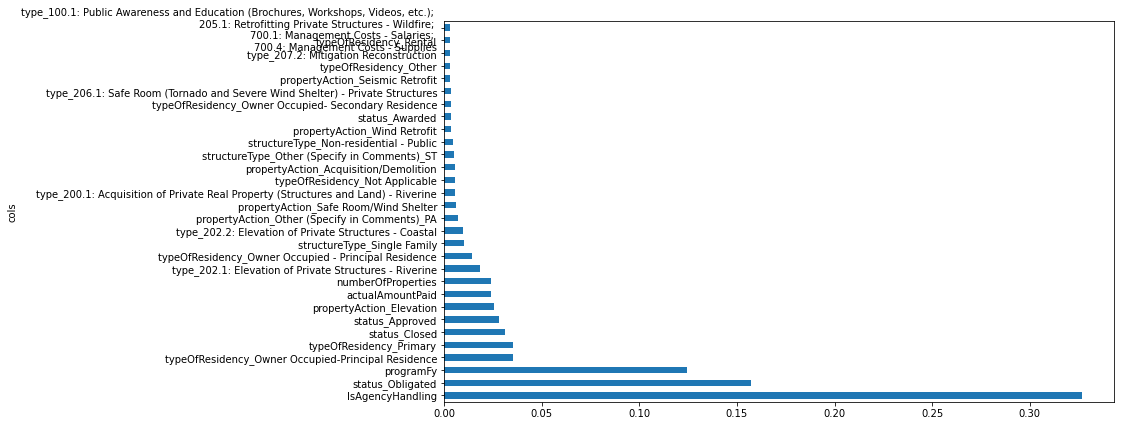

In [ ]:
#Understaning Feature Importance
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv=3)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.98629472 0.98495967 0.98641519]


In [ ]:
#Average accuracy for the baseline RF trained model is 98.5% so Random Forest is an ideal or suitable part next phase we perform optimization(Hypertuning technique to obtain a ideal model )
scores.mean()

0.98588986001326

In [ ]:
#Hypertuning with Random Forest
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
   
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': n_estimators
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,scoring='accuracy', verbose = 2)

In [ ]:
grid_search1.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [ ]:
grid_search1.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [ ]:
grid_search1.cv_results_

{'mean_fit_time': array([ 8.50628742, 15.10636981, 23.18934846, 37.03230468,  8.48228343,
        15.49071995, 21.94420242, 36.32464004,  7.79790227, 14.25148352,
        21.16587345, 31.11792906]),
 'mean_score_time': array([0.95483311, 1.40121071, 1.93858266, 2.97986603, 0.96471024,
        1.34316365, 1.81919273, 2.97095641, 1.07825557, 1.77562412,
        2.43521047, 3.37098304]),
 'mean_test_score': array([0.98532386, 0.985526  , 0.98552599, 0.98526321, 0.98544514,
        0.98542493, 0.98548557, 0.98532385, 0.98500041, 0.98506105,
        0.98516213, 0.9851217 ]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt',
                    'sqrt', 'log2', 'log2', 'log2', 'log2'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 500, 100, 200, 300, 500, 100, 

In [ ]:
y_pred1 = grid_search1.predict(x_test)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred1)) 

ACCURACY OF THE MODEL:  0.9857685776663702


In [ ]:
grid_search1.classes_

array(['FMA', 'HMGP', 'LPDM', 'PDM', 'RFC', 'SRL'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1,labels=grid_search1.classes_)
#print(confusion_matrix)
pd.DataFrame(confusion_matrix,index=grid_search1.classes_,columns=grid_search1.classes_)

,FMA,HMGP,LPDM,PDM,RFC,SRL
FMA,436,0,4,40,3,26
HMGP,0,11400,0,0,0,0
LPDM,2,0,22,8,3,3
PDM,35,1,4,223,4,9
RFC,4,0,0,0,10,5
SRL,9,0,4,2,10,100


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, target_names=grid_search1.classes_))

              precision    recall  f1-score   support

         FMA       0.90      0.86      0.88       509
        HMGP       1.00      1.00      1.00     11400
        LPDM       0.65      0.58      0.61        38
         PDM       0.82      0.81      0.81       276
         RFC       0.33      0.53      0.41        19
         SRL       0.70      0.80      0.75       125

    accuracy                           0.99     12367
   macro avg       0.73      0.76      0.74     12367
weighted avg       0.99      0.99      0.99     12367



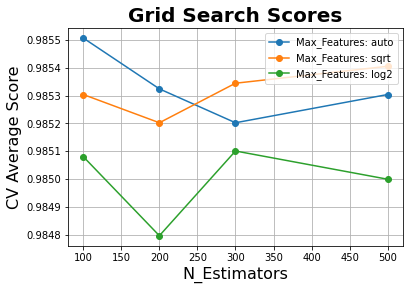

In [ ]:
#plotting Hypertuning results and code has been taken from the medium article.
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid('on')
plot_grid_search(grid_search1.cv_results_, [100, 200, 300, 500], ['auto', 'sqrt', 'log2'], 'N_Estimators', 'Max_Features')